#Import data

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns

In [141]:
path="/content/drive/MyDrive/IE224/Process 2/data_process2.csv"

In [142]:
df= pd.read_csv(path)

In [143]:
df

,Company,TypeName,Inches,OpSys,Weight,Price,Ram_capacity,Ram_model,Touchscreen,Screen_resolution,...,Memory1,Memory2,Capacity1,Storage_Type_1,Capacity2,Storage_Type_2,ScreenResolution_encoded,Cpu_encoded,Gpu_encoded,Memory_encoded
0,Lenovo,Notebook,17.3,Windows 10,2.40,319.0,6.0,0,0,1920x1080,...,128GB HDD,0,128.0,HDD,0.0,0,35,0,18,0
1,HP,Notebook,17.3,Windows 10,2.65,363.8,4.0,0,0,1920x1080,...,128GB HDD,0,128.0,HDD,0.0,0,42,0,29,0
2,Acer,Notebook,17.3,Windows 10,2.20,370.2,4.0,0,0,1366x768,...,128GB HDD,0,128.0,HDD,0.0,0,0,1,34,0
3,HP,Notebook,15.6,Windows 10,2.71,418.8,4.0,0,0,1920x1080,...,500GB HDD,0,500.0,HDD,0.0,0,42,1,7,10
4,HP,Notebook,17.3,Windows 10,1.91,363.7,4.0,0,0,1920x1080,...,128GB HDD,0,128.0,HDD,0.0,0,42,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Alienware,Gaming,18.4,System Windows 11 Pro,2.04,2275.0,325.0,1,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,66,116,110,5
1353,Alienware,Gaming,18.4,System Windows 11 Pro,2.04,2279.0,325.0,1,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,66,116,110,5
1354,Alienware,Gaming,18.4,System Windows 11 Pro,2.04,2488.0,164.0,1,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,66,116,40,5
1355,Alienware,Gaming,18.4,System RTX 3080,2.04,2499.0,324.0,1,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,66,116,110,5


In [144]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'OpSys', 'Weight', 'Price',
       'Ram_capacity', 'Ram_model', 'Touchscreen', 'Screen_resolution',
       'Brand_RAM', 'Model', 'Clockspeed', 'Memory1', 'Memory2', 'Capacity1',
       'Storage_Type_1', 'Capacity2', 'Storage_Type_2',
       'ScreenResolution_encoded', 'Cpu_encoded', 'Gpu_encoded',
       'Memory_encoded'],
      dtype='object')

In [145]:
data_types = df.dtypes

numeric_columns = data_types[(data_types == 'float64') | (data_types == 'int64')].index
categorical_columns = data_types[data_types == 'object'].index

# In danh sách các cột biến số và biến phân loại
print("Biến số:")
print(numeric_columns)

print("\nBiến phân loại:")
print(categorical_columns)

Biến số:
Index(['Inches', 'Weight', 'Price', 'Ram_capacity', 'Ram_model', 'Touchscreen',
       'Clockspeed', 'Memory2', 'Capacity1', 'Capacity2', 'Storage_Type_2',
       'ScreenResolution_encoded', 'Cpu_encoded', 'Gpu_encoded',
       'Memory_encoded'],
      dtype='object')

Biến phân loại:
Index(['Company', 'TypeName', 'OpSys', 'Screen_resolution', 'Brand_RAM',
       'Model', 'Memory1', 'Storage_Type_1'],
      dtype='object')


#EDA

## Phân tích EDA bằng Thống kê mô tả

In [146]:
df.describe()

,Inches,Weight,Price,Ram_capacity,Ram_model,Touchscreen,Clockspeed,Memory2,Capacity1,Capacity2,Storage_Type_2,ScreenResolution_encoded,Cpu_encoded,Gpu_encoded,Memory_encoded
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,16.360575,2.031606,743.883051,19.613117,0.078113,0.137804,2.321076,0.236551,405.302874,216.960943,0.236551,33.826824,79.104643,53.855564,4.917465
std,1.398598,0.646050,457.586072,46.243599,0.268449,0.344821,0.488667,0.425121,324.234302,401.515091,0.425121,18.743304,26.478342,21.634870,4.142267
min,11.600000,0.690000,111.200000,2.000000,0.000000,0.000000,0.900000,0.000000,128.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.600000,1.540000,408.600000,4.000000,0.000000,0.000000,2.000000,0.000000,128.000000,0.000000,0.000000,34.000000,66.000000,43.000000,1.000000
50%,17.300000,2.040000,638.700000,8.000000,0.000000,0.000000,2.500000,0.000000,256.000000,0.000000,0.000000,35.000000,81.000000,53.000000,4.000000
75%,17.300000,2.300000,958.400000,12.000000,0.000000,0.000000,2.700000,0.000000,512.000000,0.000000,0.000000,42.000000,100.000000,69.000000,8.000000
max,18.400000,4.700000,3899.500000,644.000000,1.000000,1.000000,3.600000,1.000000,1000.000000,2000.000000,1.000000,66.000000,116.000000,110.000000,14.000000


In [147]:
mean_price = df['Price'].mean()

# Trung vị của cột 'Price'
median_price = df['Price'].median()

print(f"Trung bình Price: {mean_price}")
print(f"Trung vị Price: {median_price}")

Trung bình Price: 743.8830508474576
Trung vị Price: 638.7


In [148]:
# Độ lệch chuẩn của cột 'Price'
std_price = df['Price'].std()

print(f"Độ lệch chuẩn Price: {std_price}")

Độ lệch chuẩn Price: 457.58607176721


##Phân tích EDA bằng biểu đồ

Ma trận tương quan của các thuộc tính

<ipython-input-149-38bea3bfd6ca>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



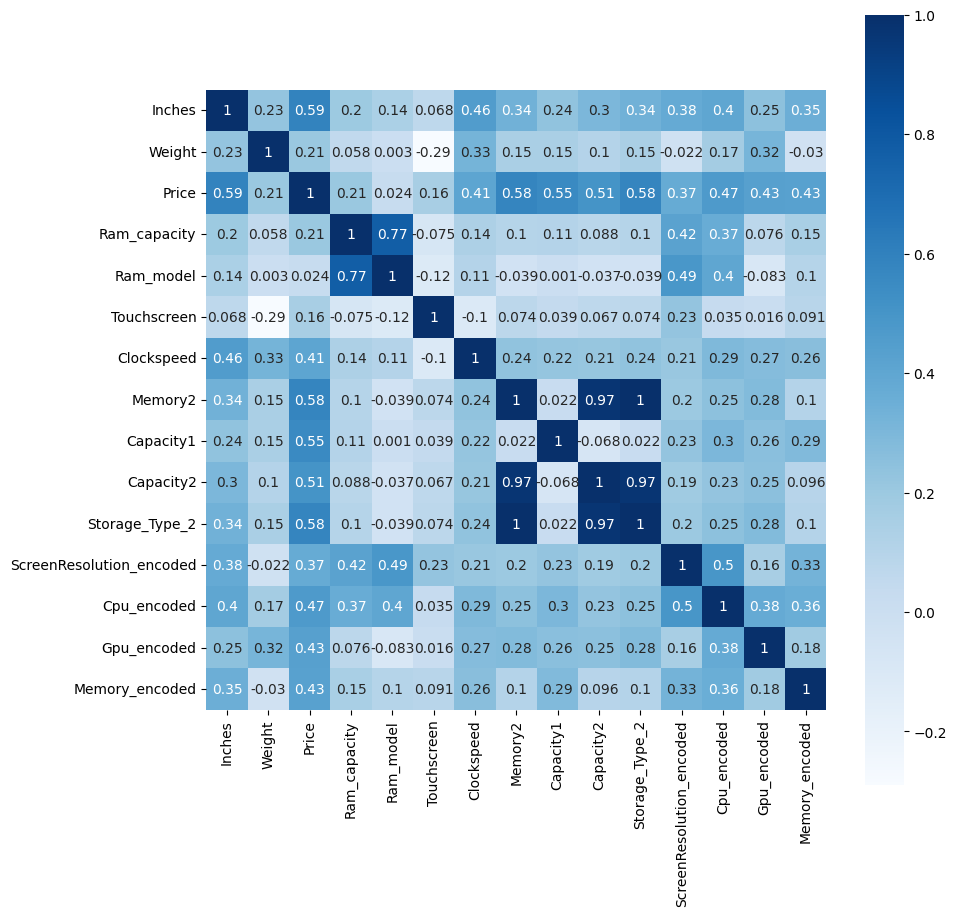

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr(method='pearson')
fig = plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues');

##Quan sát thăm dò Giá tiền bằng biểu đồ

In [150]:
import plotly.figure_factory as ff
import numpy as np

# Assume df là DataFrame chứa dữ liệu của bạn
# Nếu df chưa có, hãy thay thế nó bằng tên DataFrame thích hợp của bạn

# Chuyển đổi biểu đồ phân phối từ seaborn sang plotly
fig = ff.create_distplot([df['Price']], ['Price'], show_hist=False)

# Tùy chỉnh trục y
fig.update_layout(yaxis=dict(tickvals=np.arange(0, df['Price'].max(), 100)))

# Tùy chỉnh tiêu đề
fig.update_layout(title_text='Biểu đồ phân phối của giá tiền')

# Hiển thị biểu đồ
fig.show()

Giá của lap bị lệch phải (Dữ liệu phân bổ tập trung bên trái)

In [151]:
import plotly.express as px



fig = px.box(df, y='Price')

fig.update_layout(title_text='Box Plot của giá tiền')

fig.show()

Giá trị ngoại lệ của biến Price của laptop nằm từ 1774-3899.5

In [152]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.box(df, y='Price', labels={'Price': 'Price'}, title="Boxplot of the target variable 'price'")
fig.show()

Giá tiền tồn tại nhiều biến ngoại lệ.

In [153]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Xác định độ lệch interquartile (IQR)
IQR = Q3 - Q1

# Xác định ngưỡng cho giá trị ngoại lệ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc ra các giá trị ngoại lệ
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
outliers

,Company,TypeName,Inches,OpSys,Weight,Price,Ram_capacity,Ram_model,Touchscreen,Screen_resolution,...,Memory1,Memory2,Capacity1,Storage_Type_1,Capacity2,Storage_Type_2,ScreenResolution_encoded,Cpu_encoded,Gpu_encoded,Memory_encoded
673,Apple,Gaming,18.4,macOS,1.83,1827.3,32.0,0,0,2880x1800,...,1TB SSD,1,1000.0,SSD,512.0,1,51,85,11,6
782,Dell,Gaming,18.4,System Windows 11 Pro,4.42,1790.2,32.0,0,0,1920x1080,...,1TB SSD,1,1000.0,SSD,512.0,1,35,90,80,6
783,HP,Gaming,18.4,System Windows 11 Pro,3.00,1853.5,32.0,0,0,1920x1080,...,1TB SSD,1,1000.0,SSD,512.0,1,42,90,3,6
784,HP,Gaming,18.4,System Windows 11 Pro,3.00,2525.1,64.0,0,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,42,90,105,5
792,Asus,Gaming,18.4,System Windows 11 Pro,3.80,1789.6,32.0,0,0,1920x1080,...,1TB SSD,1,1000.0,SSD,512.0,1,42,91,82,6
793,Lenovo,Gaming,18.4,System Windows 11 Pro,4.60,2071.5,32.0,0,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,42,91,93,5
794,Asus,Gaming,18.4,System Windows 11 Pro,3.58,2541.5,64.0,0,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,42,91,92,5
801,Lenovo,Gaming,18.4,System Windows 11 Pro,2.40,1897.6,32.0,0,0,3840x2160,...,1TB SSD,1,1000.0,SSD,512.0,1,39,92,99,6
802,MSI,Gaming,18.4,System Windows 11 Pro,4.40,1789.6,32.0,0,0,1920x1080,...,1TB SSD,1,1000.0,SSD,512.0,1,35,93,62,6
931,Toshiba,Gaming,18.4,System Windows 11 Pro,1.05,1789.6,32.0,0,1,1920x1080,...,1TB SSD,1,1000.0,SSD,512.0,1,34,95,53,6


## EDA các biến (['Company', 'TypeName', 'Screen_resolution', 'Brand_RAM', 'Storage_Type_1']) bằng biểu đồ

### Company

Boxplot

In [154]:
import plotly.express as px

fig = px.box(df, x='Company', y='Price')

fig.update_layout(title_text='Biểu đồ Boxplot và Cột theo Company cho Price')

fig.show()

Wordclound

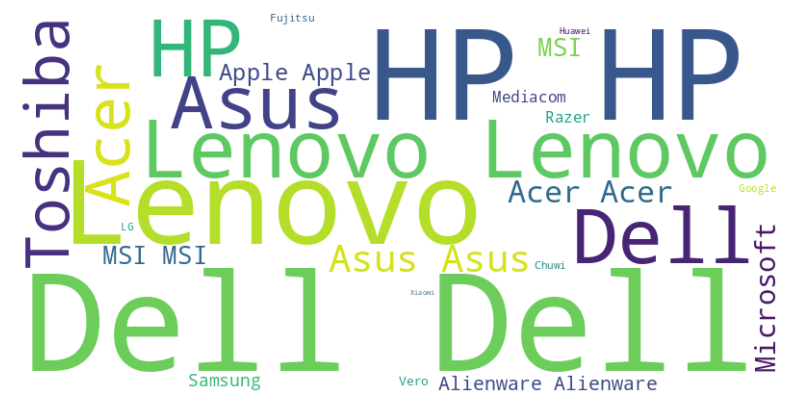

In [155]:
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate the company names into a single string
text = ' '.join(df['Company'])
colormap = 'viridis'
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)


# Plot the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###TypeName

In [156]:
# Vẽ biểu đồ cột
fig = px.bar(df, x='TypeName', y='Price', color='TypeName')

# Tùy chỉnh tiêu đề
fig.update_layout(title_text='Biểu đồ Cột theo TypeName cho Price')

# Hiển thị biểu đồ
fig.show()

In [157]:
import plotly.express as px

# Assume df là DataFrame chứa dữ liệu của bạn
# Nếu df chưa có, hãy thay thế nó bằng tên DataFrame thích hợp của bạn

# Vẽ biểu đồ boxplot
fig = px.box(df, x='TypeName', y='Price', title='Biểu đồ Boxplot theo TypeName cho Price')

# Hiển thị biểu đồ
fig.show()

Note book

###Screen_resolution

In [158]:
fig = px.box(df, x='Screen_resolution', y='Price', title='Biểu đồ Boxplot theo Screen_resolution cho Price')

# Hiển thị biểu đồ
fig.show()

In [159]:
import plotly.express as px

# Assume df là DataFrame chứa dữ liệu của bạn
# Nếu df chưa có, hãy thay thế nó bằng tên DataFrame thích hợp của bạn

# Vẽ biểu đồ barplot
fig = px.bar(df, x='Screen_resolution', y='Price', title='Biểu đồ Barplot theo Screen_resolution cho Price')

# Hiển thị biểu đồ
fig.show()


###Brand_RAM

In [160]:
fig = px.bar(df, x='Brand_RAM', y='Price', title='Biểu đồ Barplot theo Brand_RAM cho Price')

# Hiển thị biểu đồ
fig.show()

In [161]:
fig = px.box(df, x='Brand_RAM', y='Price', title='Biểu đồ Boxplot theo Brand_RAM cho Price')

# Hiển thị biểu đồ
fig.show()

###Storage_Type_1

In [162]:
fig = px.bar(df, x='Storage_Type_1', y='Price', title='Biểu đồ Barplot theo Storage_Type_1 cho Price')
fig.show()

In [163]:
fig = px.box(df, x='Storage_Type_1', y='Price', title='Biểu đồ Boxplot theo Storage_Type_1 cho Price')

fig.show()

##Kiểm tra tính đối xứng

In [164]:
df_doi_xung=df[['Inches', 'Weight', 'Price', 'Ram_capacity', 'Ram_model', 'Touchscreen',
       'Clockspeed', 'Memory2', 'Capacity1', 'Capacity2', 'Storage_Type_2']]

In [165]:
def KiemTraDoiXung(data: pd.Series, percent: float):
  median = data.median()
  mean = data.mean()
  mode = data.mode()
  return len (mode)==1 and (mean - (percent / 100) * mean <= median <= mean + (percent / 100) * mean)

In [166]:
def KiemTraCacBien(ds:pd.DataFrame):
  d={}
  for col in ds.columns:
    d[col]=KiemTraDoiXung(ds[col],10)
  return d

In [167]:
KiemTraCacBien(df_doi_xung)

{'Inches': True,
 'Weight': True,
 'Price': False,
 'Ram_capacity': False,
 'Ram_model': False,
 'Touchscreen': False,
 'Clockspeed': True,
 'Memory2': False,
 'Capacity1': False,
 'Capacity2': False,
 'Storage_Type_2': False}

In [168]:
import pandas as pd

def KiemTraDoiXung(data: pd.Series, percent: float):
    median = data.median()
    mean = data.mean()
    mode = data.mode()
    return len(mode) == 1 and (mean <= median <= mode[0])

def KiemTraCacBien(ds: pd.DataFrame):
    d = {}
    for col in ds.columns:
        d[col] = KiemTraDoiXung(ds[col], 10)
    return d

KiemTraCacBien(df_doi_xung)

{'Inches': True,
 'Weight': True,
 'Price': False,
 'Ram_capacity': False,
 'Ram_model': False,
 'Touchscreen': False,
 'Clockspeed': True,
 'Memory2': False,
 'Capacity1': False,
 'Capacity2': False,
 'Storage_Type_2': False}

#**PEARSON**

##(['Inches', 'Weight', 'Price', 'Ram_capacity', 'Ram_model', 'Touchscreen','Clockspeed', 'Memory2', 'Capacity1', 'Capacity2', 'Storage_Type_2'])

##Phân tích Pearson correlation

In [169]:
df_pearson=df[['Inches', 'Weight', 'Price', 'Ram_capacity', 'Ram_model', 'Touchscreen',
              'Clockspeed', 'Memory2', 'Capacity1', 'Capacity2', 'Storage_Type_2',
              'ScreenResolution_encoded', 'Cpu_encoded', 'Gpu_encoded',
              'Memory_encoded']]

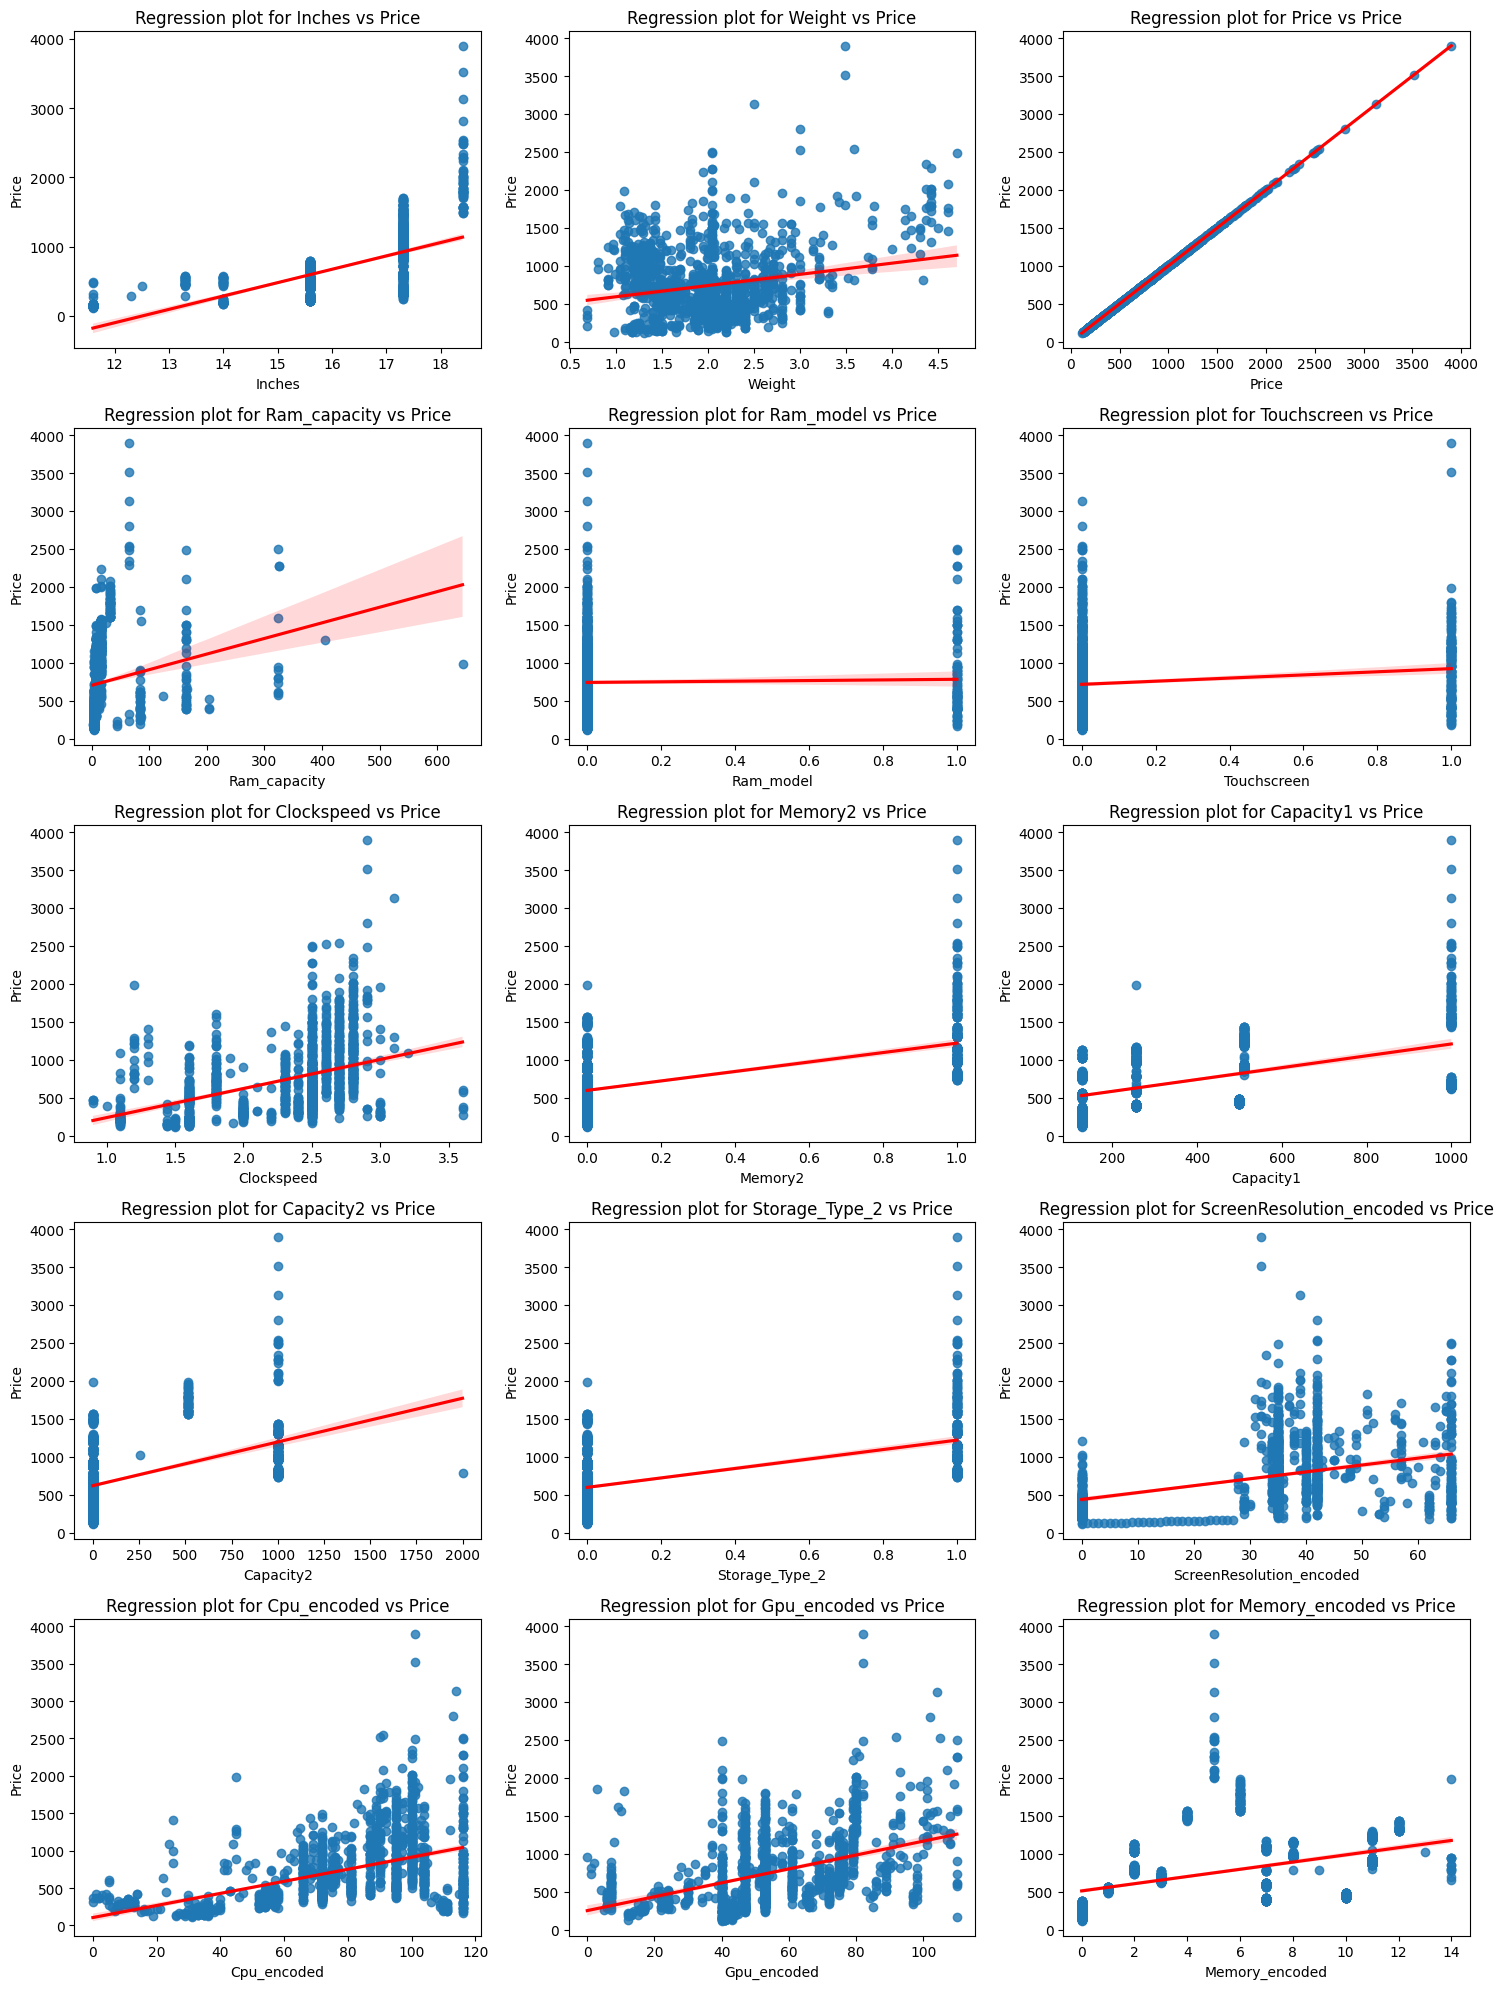

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df_pearson is your DataFrame with selected columns

# Calculate the number of rows and columns for the subplot grid
n_rows = 5
n_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))

# Flatten the subplot grid for easier indexing
axes = axes.flatten()

# Loop through each column and create a regression plot in the corresponding subplot
for i, col in enumerate(df_pearson.columns):
    sns.regplot(x=col, y="Price", data=df, ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f'Regression plot for {col} vs Price')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [171]:
df_pearson1=df[['Inches', 'Weight', 'Price', 'Ram_capacity', 'Ram_model', 'Touchscreen',
              'Clockspeed', 'Memory2', 'Capacity1', 'Capacity2', 'Storage_Type_2',
              'ScreenResolution_encoded', 'Cpu_encoded', 'Gpu_encoded',
              'Memory_encoded']]

In [172]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Tìm r và p-values
def kiemTraMucDoAnhHuong(s1: pd.Series, s2: pd.Series) -> bool:
    r, p = stats.pearsonr(s1, s2)
    if p < 0.05 and (r < -0.3 or r > 0.3):
        return True
    return False

In [173]:
anh_huong=[]
def timBienAnhHuong(df: pd.DataFrame, target_column: str):
    anh_huong = {'Feature': [], 'r': [], 'p-value': []}
    for col in df.columns:
        if col != target_column and kiemTraMucDoAnhHuong(df[col], df[target_column]):
            anh_huong['Feature'].append(col)
            anh_huong['r'].append(stats.pearsonr(df[col], df[target_column])[0])
            anh_huong['p-value'].append(stats.pearsonr(df[col], df[target_column])[1])
    return pd.DataFrame(anh_huong)

In [174]:
# Chọn biến mục tiêu
target_variable = 'Price'

# Tìm các biến ảnh hưởng đến giá xe
anh_huong_vars = timBienAnhHuong(df_pearson1, target_variable)
print("Các biến ảnh hưởng đến giá xe là:\n", anh_huong_vars)

Các biến ảnh hưởng đến giá xe là:
                     Feature         r        p-value
0                    Inches  0.589572  7.948574e-128
1                Clockspeed  0.409116   6.709228e-56
2                   Memory2  0.578382  5.552393e-122
3                 Capacity1  0.553043  1.493384e-109
4                 Capacity2  0.505436   6.813275e-89
5            Storage_Type_2  0.578382  5.552393e-122
6  ScreenResolution_encoded  0.371267   1.334099e-45
7               Cpu_encoded  0.466667   2.493980e-74
8               Gpu_encoded  0.432816   4.627375e-63
9            Memory_encoded  0.429882   3.830788e-62


In [175]:
anh_huong_df = pd.DataFrame(anh_huong_vars)
anh_huong_df

,Feature,r,p-value
0,Inches,0.589572,7.948574e-128
1,Clockspeed,0.409116,6.709228e-56
2,Memory2,0.578382,5.552393e-122
3,Capacity1,0.553043,1.493384e-109
4,Capacity2,0.505436,6.813275e-89
5,Storage_Type_2,0.578382,5.552393e-122
6,ScreenResolution_encoded,0.371267,1.334099e-45
7,Cpu_encoded,0.466667,2.493980e-74
8,Gpu_encoded,0.432816,4.627375e-63
9,Memory_encoded,0.429882,3.830788e-62


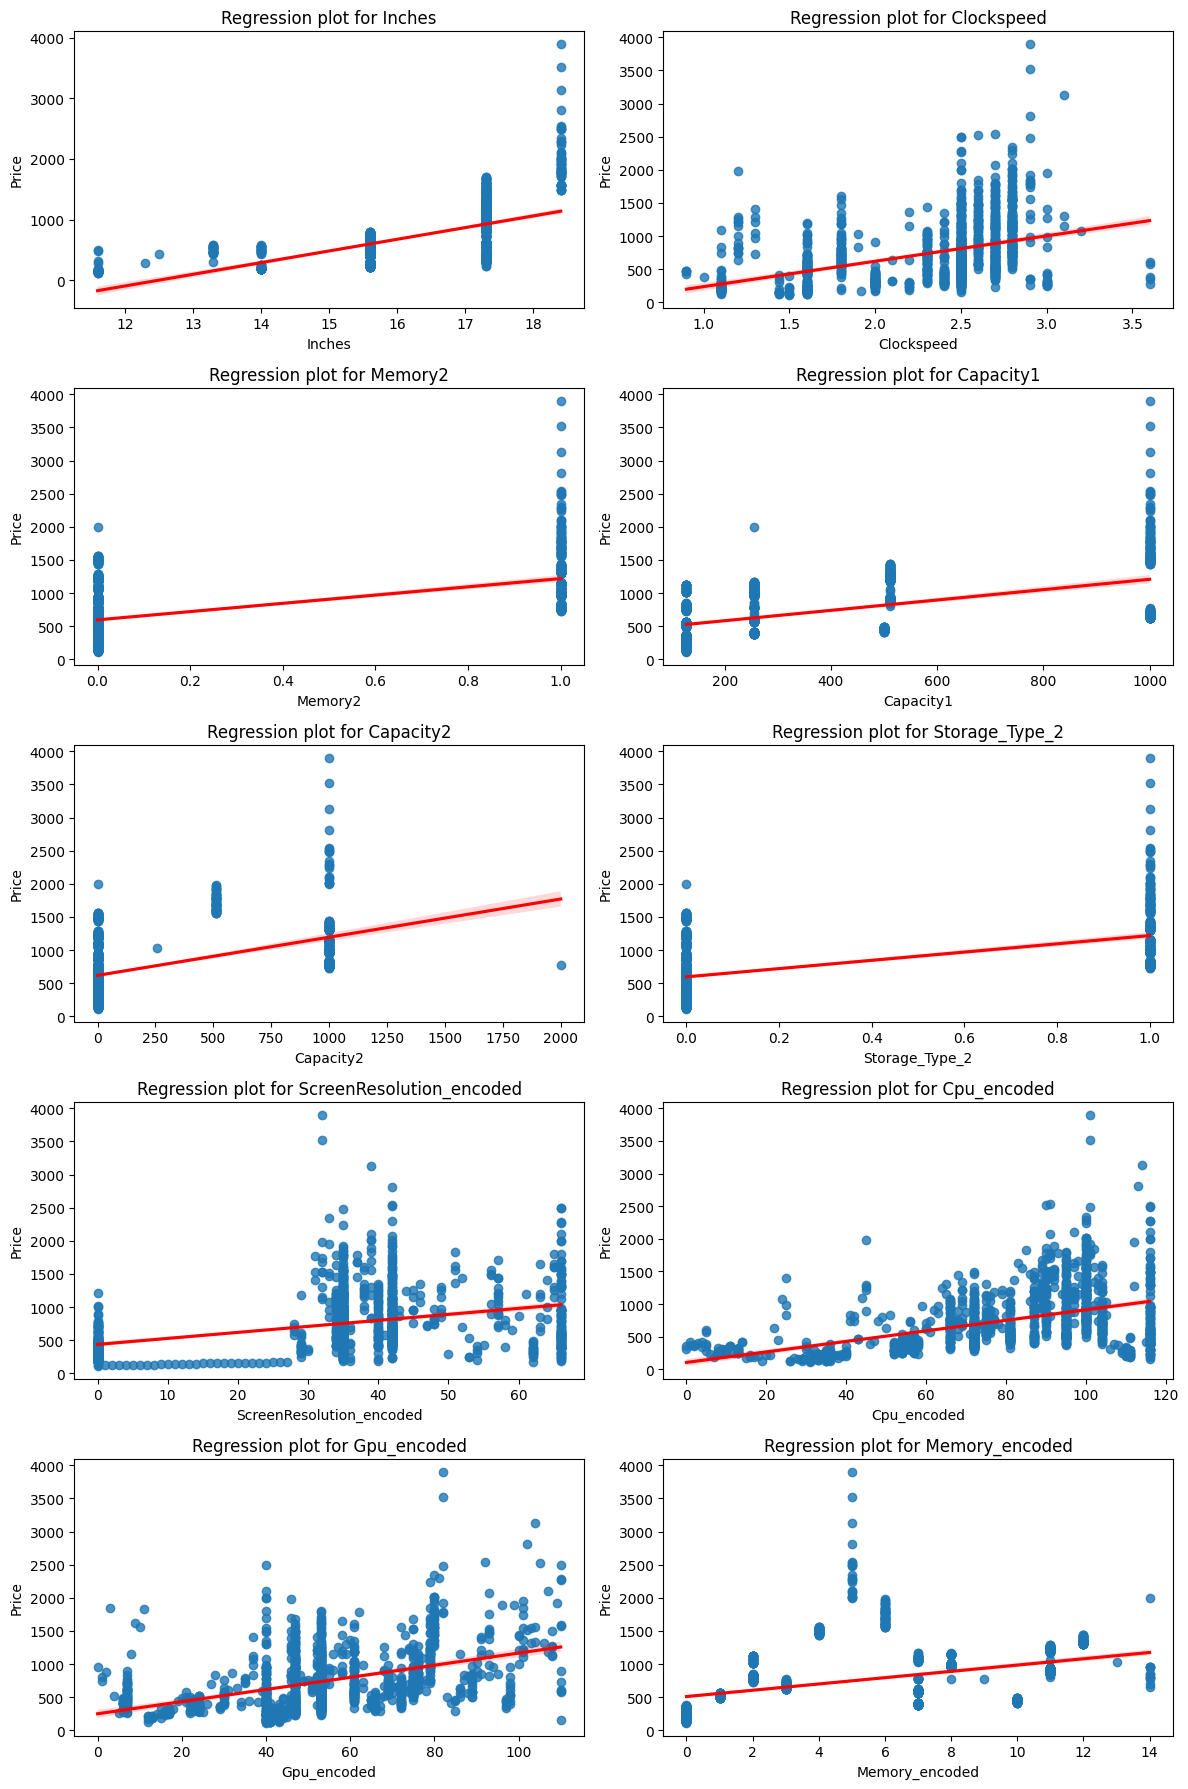

In [176]:
anh_huong_vars = anh_huong_vars['Feature'].tolist()

# Number of variables
num_vars = len(anh_huong_vars)

# Set up subplots
fig, axes = plt.subplots(nrows=num_vars // 2, ncols=2, figsize=(12, 18))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through the variables and create regression plots
for i, var in enumerate(anh_huong_vars):
    sns.regplot(x=var, y=target_variable, data=df, ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f'Regression plot for {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target_variable)

# Adjust layout
plt.tight_layout()
plt.show()

## Biến nào ảnh hưởng nhiều nhất, ít nhất

In [177]:
df_pearson_min_max = df_pearson1[anh_huong_vars].copy()


In [178]:
df_pearson_min_max

,Inches,Clockspeed,Memory2,Capacity1,Capacity2,Storage_Type_2,ScreenResolution_encoded,Cpu_encoded,Gpu_encoded,Memory_encoded
0,17.3,2.4,0,128.0,0.0,0,35,0,18,0
1,17.3,2.4,0,128.0,0.0,0,42,0,29,0
2,17.3,2.5,0,128.0,0.0,0,0,1,34,0
3,15.6,2.5,0,500.0,0.0,0,42,1,7,10
4,17.3,2.5,0,128.0,0.0,0,42,2,7,0
...,...,...,...,...,...,...,...,...,...,...
1352,18.4,2.5,1,1000.0,1000.0,1,66,116,110,5
1353,18.4,2.5,1,1000.0,1000.0,1,66,116,110,5
1354,18.4,2.5,1,1000.0,1000.0,1,66,116,40,5
1355,18.4,2.5,1,1000.0,1000.0,1,66,116,110,5


In [179]:
r_list=[]
for col in df_pearson_min_max.columns:
  r,p = stats.pearsonr( df_pearson_min_max[col], df['Price'])
  r_list.append(abs(r))
for col in df_pearson_min_max.columns:
  r,p = stats.pearsonr( df_pearson_min_max[col], df['Price'])
  if abs(r)==max(r_list):
      Max=col
  if abs(r)==min(r_list):
      Min=col

###Biến ảnh hưởng nhiều nhất

In [180]:
print("Biến ảnh hưởng nhiều nhất là", Max)

Biến ảnh hưởng nhiều nhất là Inches


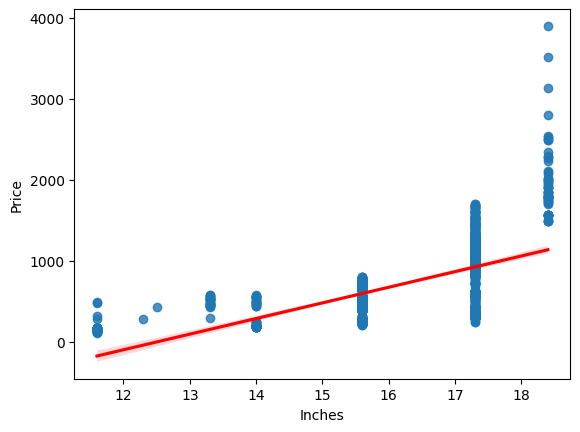

In [181]:
sns.regplot(x=Max, y='Price', data=df, line_kws={"color": "red"})
plt.show()

###Biến ảnh hưởng ít nhất

In [182]:
print("Biến ảnh hưởng ít nhất là", Min)

Biến ảnh hưởng ít nhất là ScreenResolution_encoded


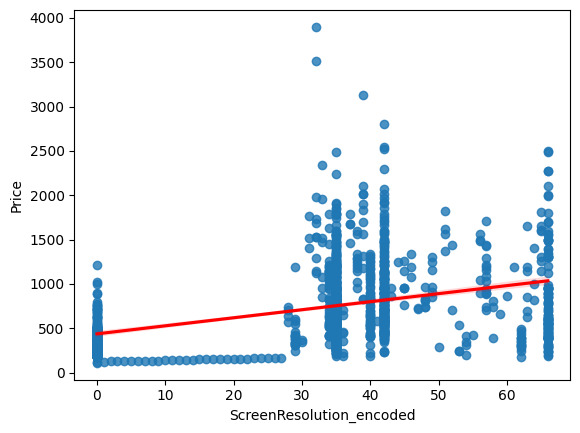

In [183]:
sns.regplot(x=Min, y='Price', data=df, line_kws={"color": "red"})
plt.show()

#**ANOVA**

'Company', 'TypeName', 'OpSys', 'Screen_resolution', 'Brand_RAM', 'Model', 'Memory1', 'Storage_Type_1

##Kiểm tra biến phân loại

In [184]:
df['Company'].value_counts()

Dell         318
HP           300
Lenovo       270
Asus         154
Acer         103
MSI           54
Toshiba       48
Microsoft     22
Apple         21
Alienware     17
Samsung        9
DELL           8
Mediacom       7
Razer          7
Vero           4
Fujitsu        3
Chuwi          3
Google         3
LG             3
Huawei         2
Xiaomi         1
Name: Company, dtype: int64

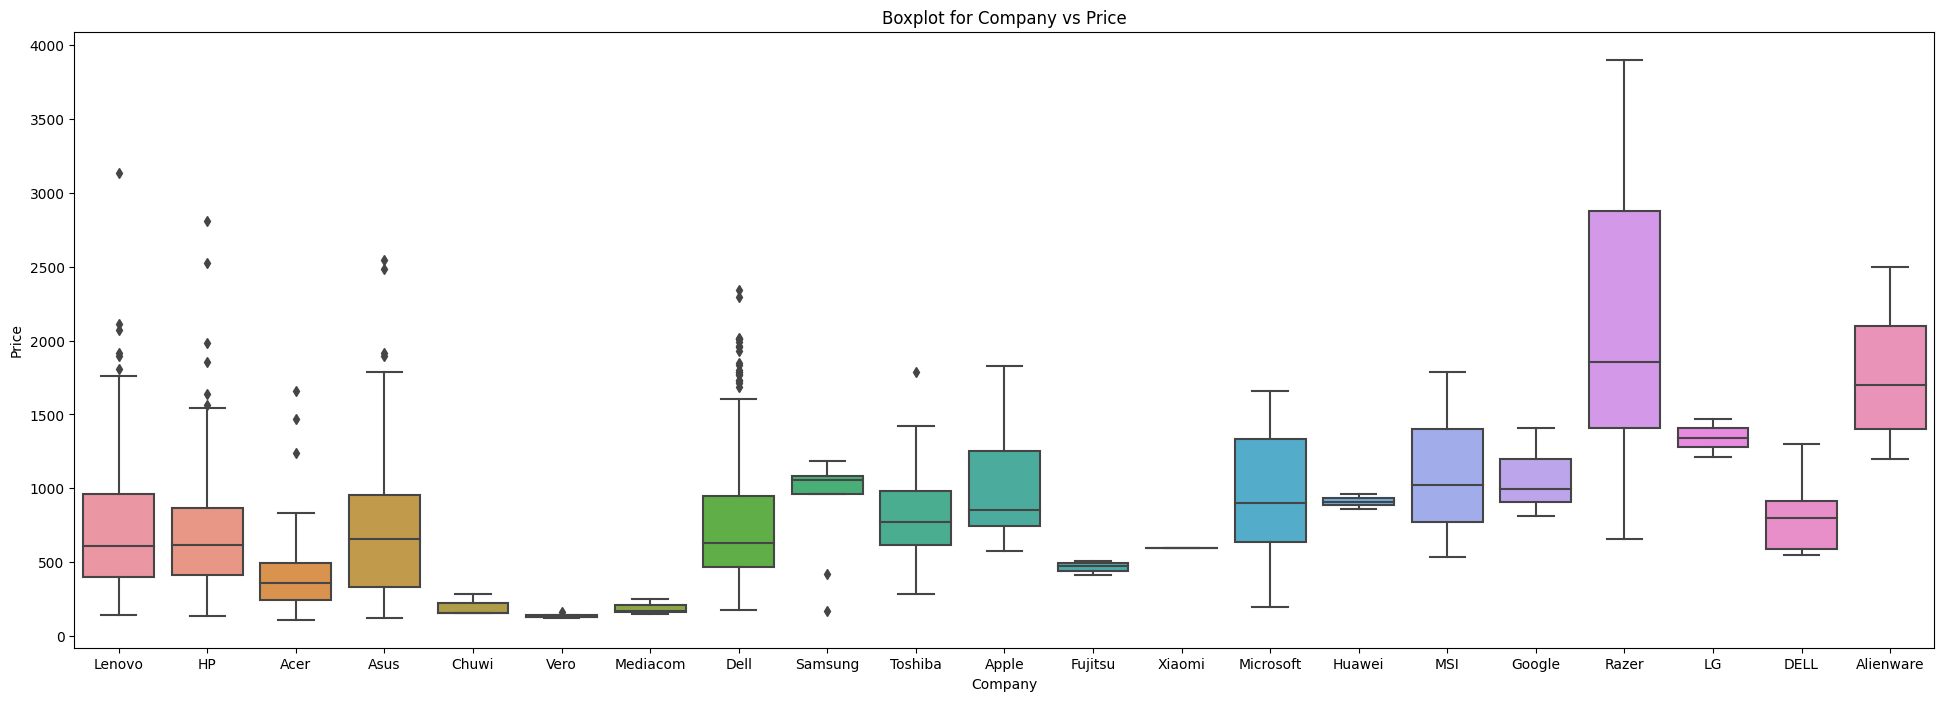

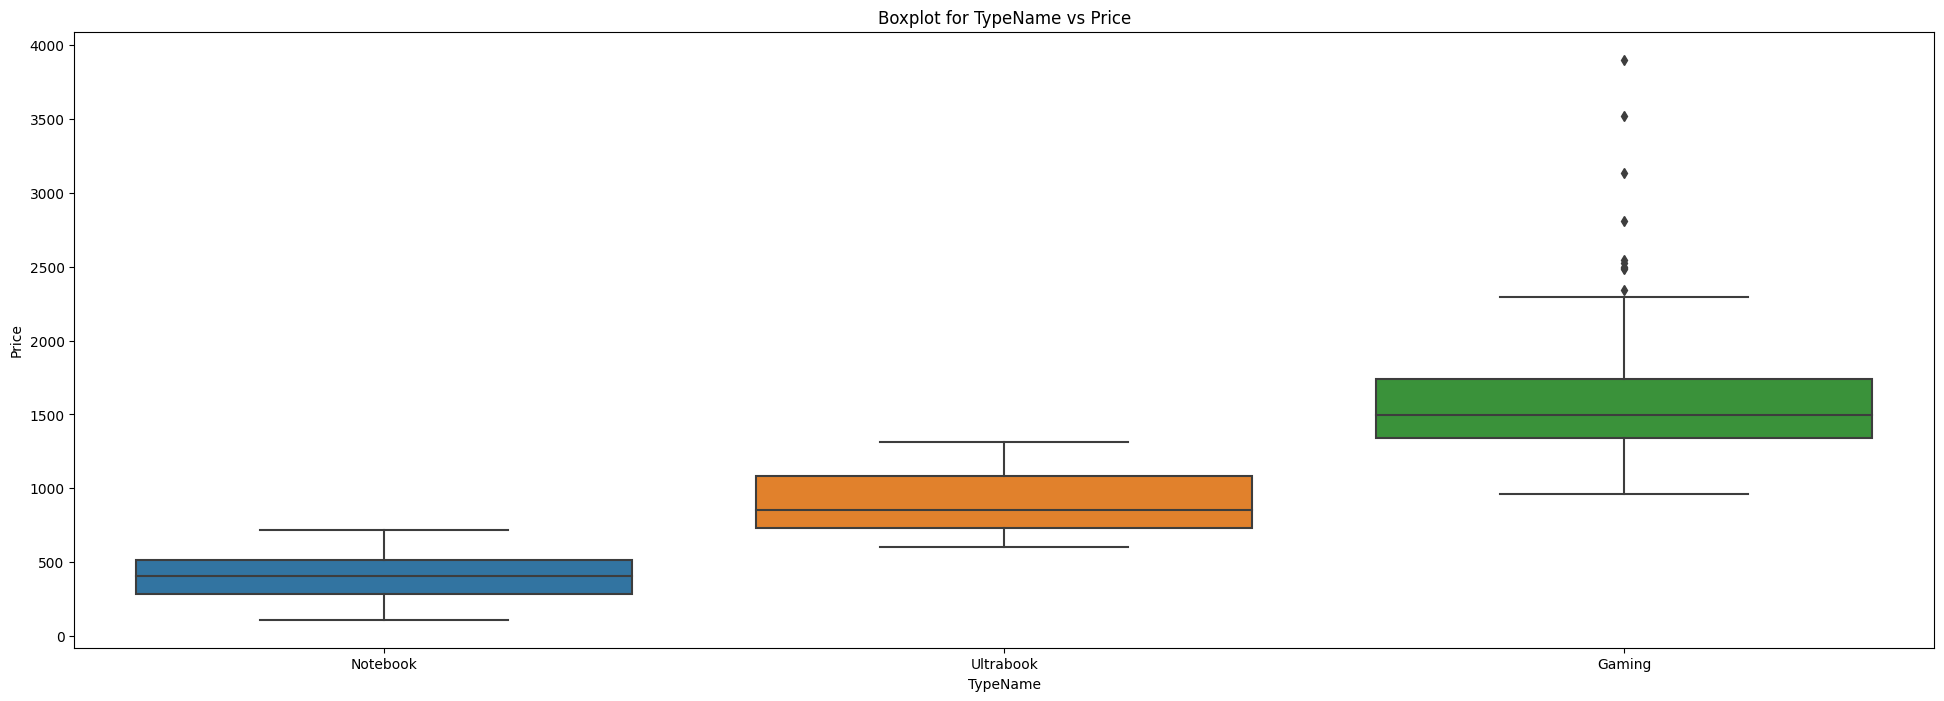

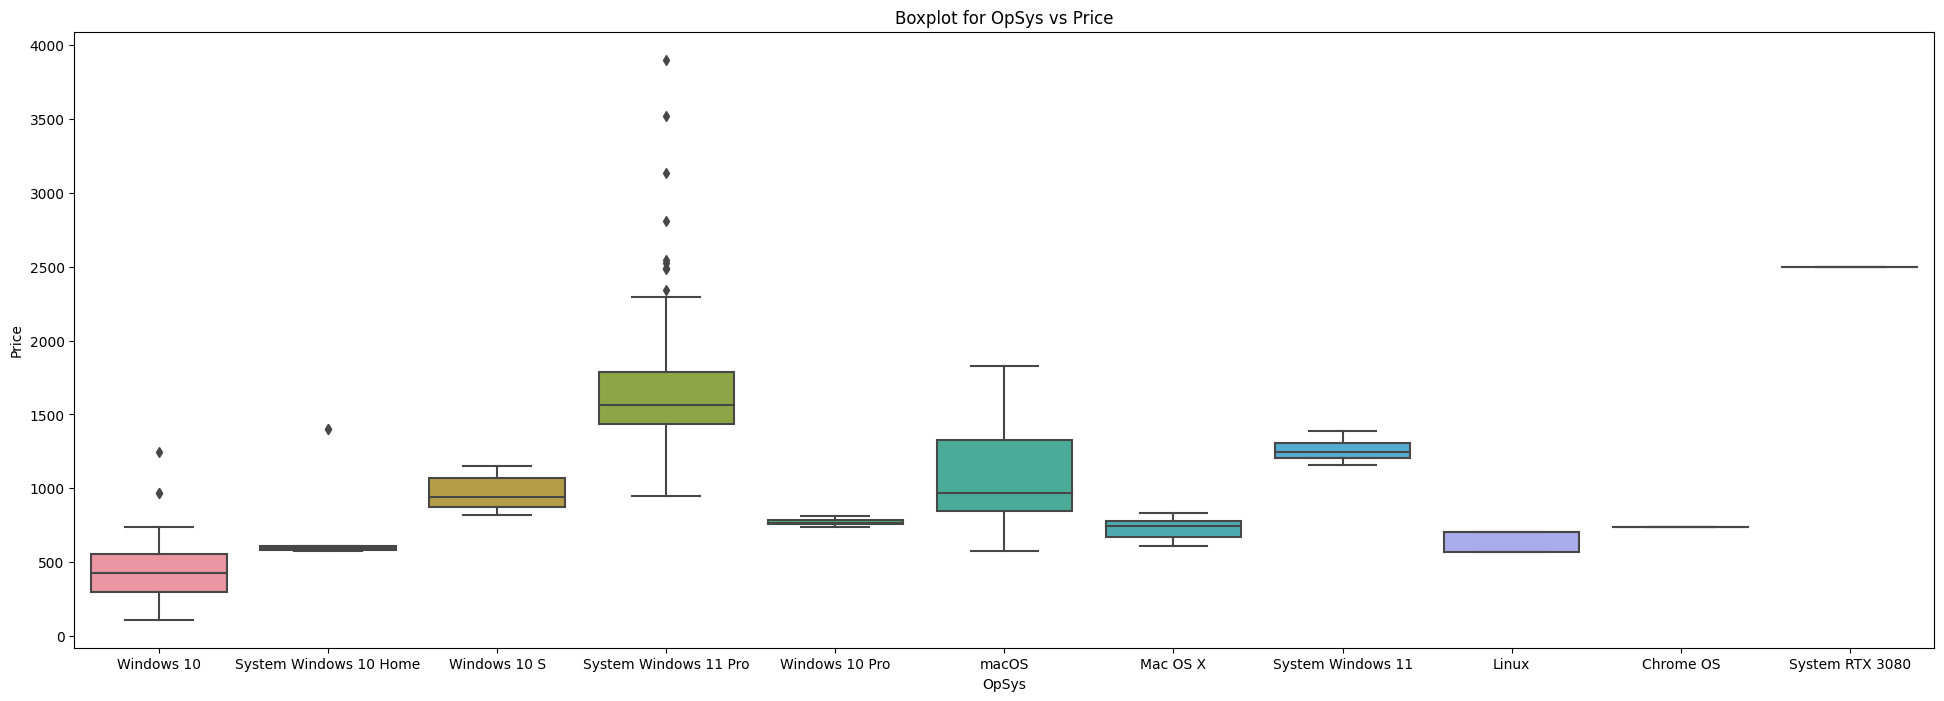

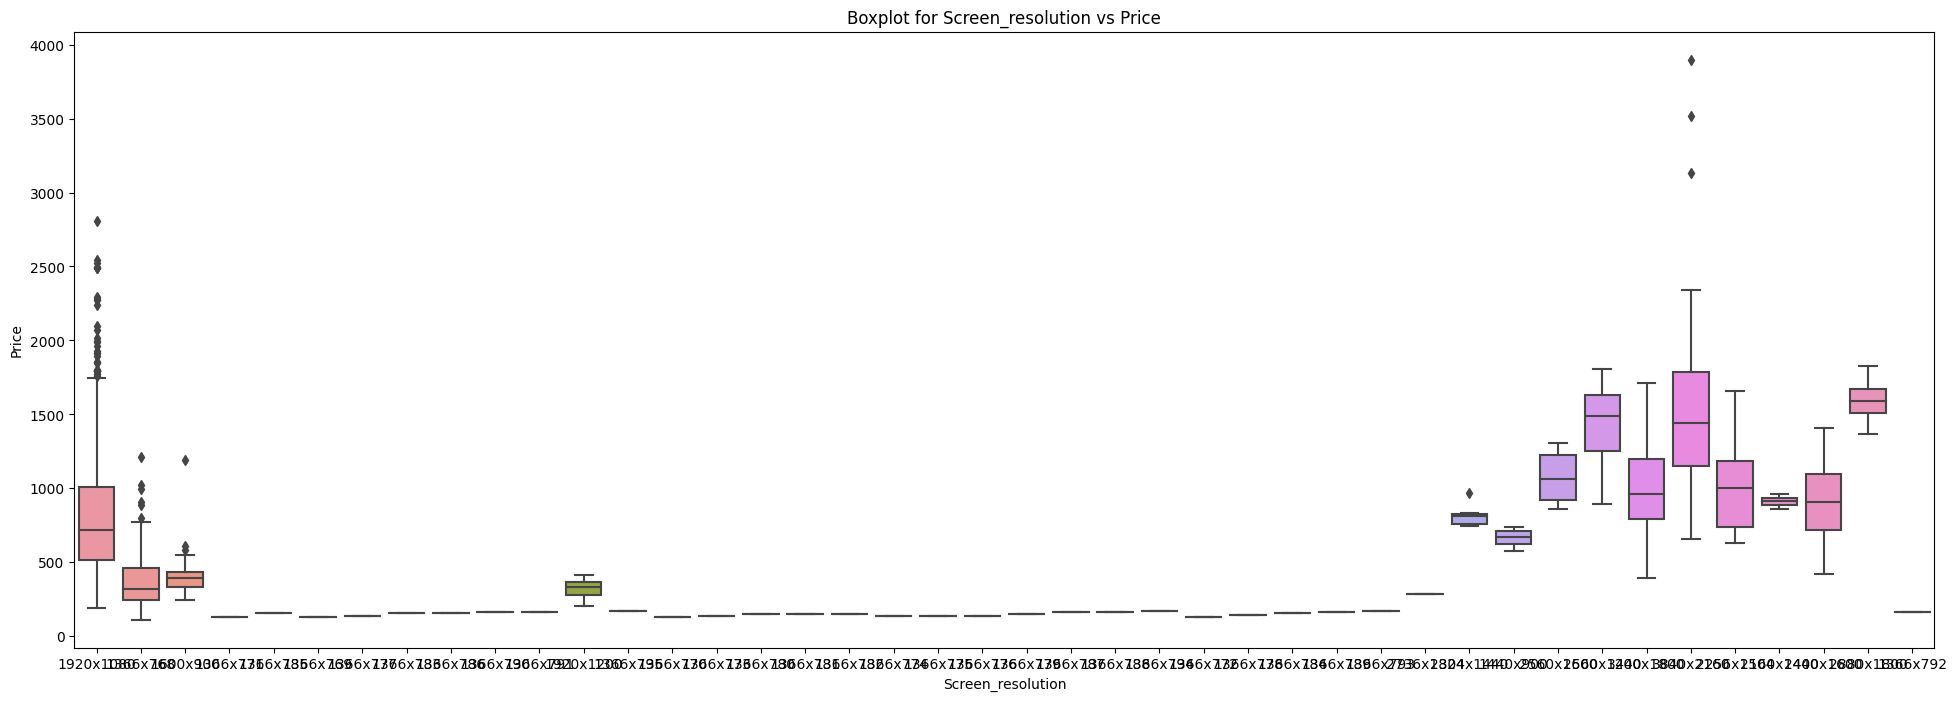

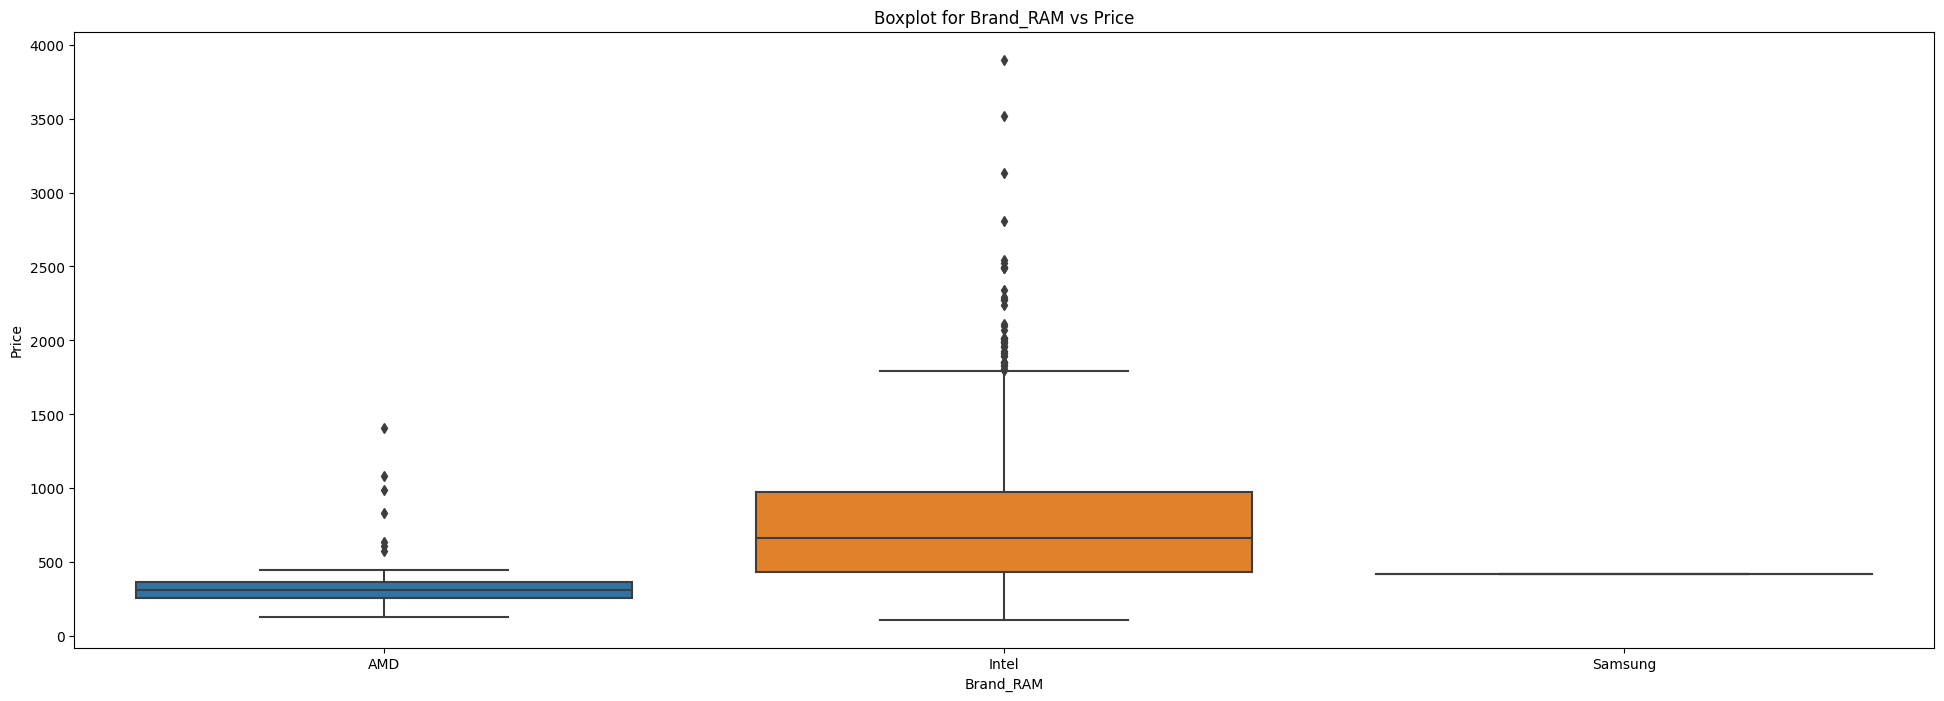

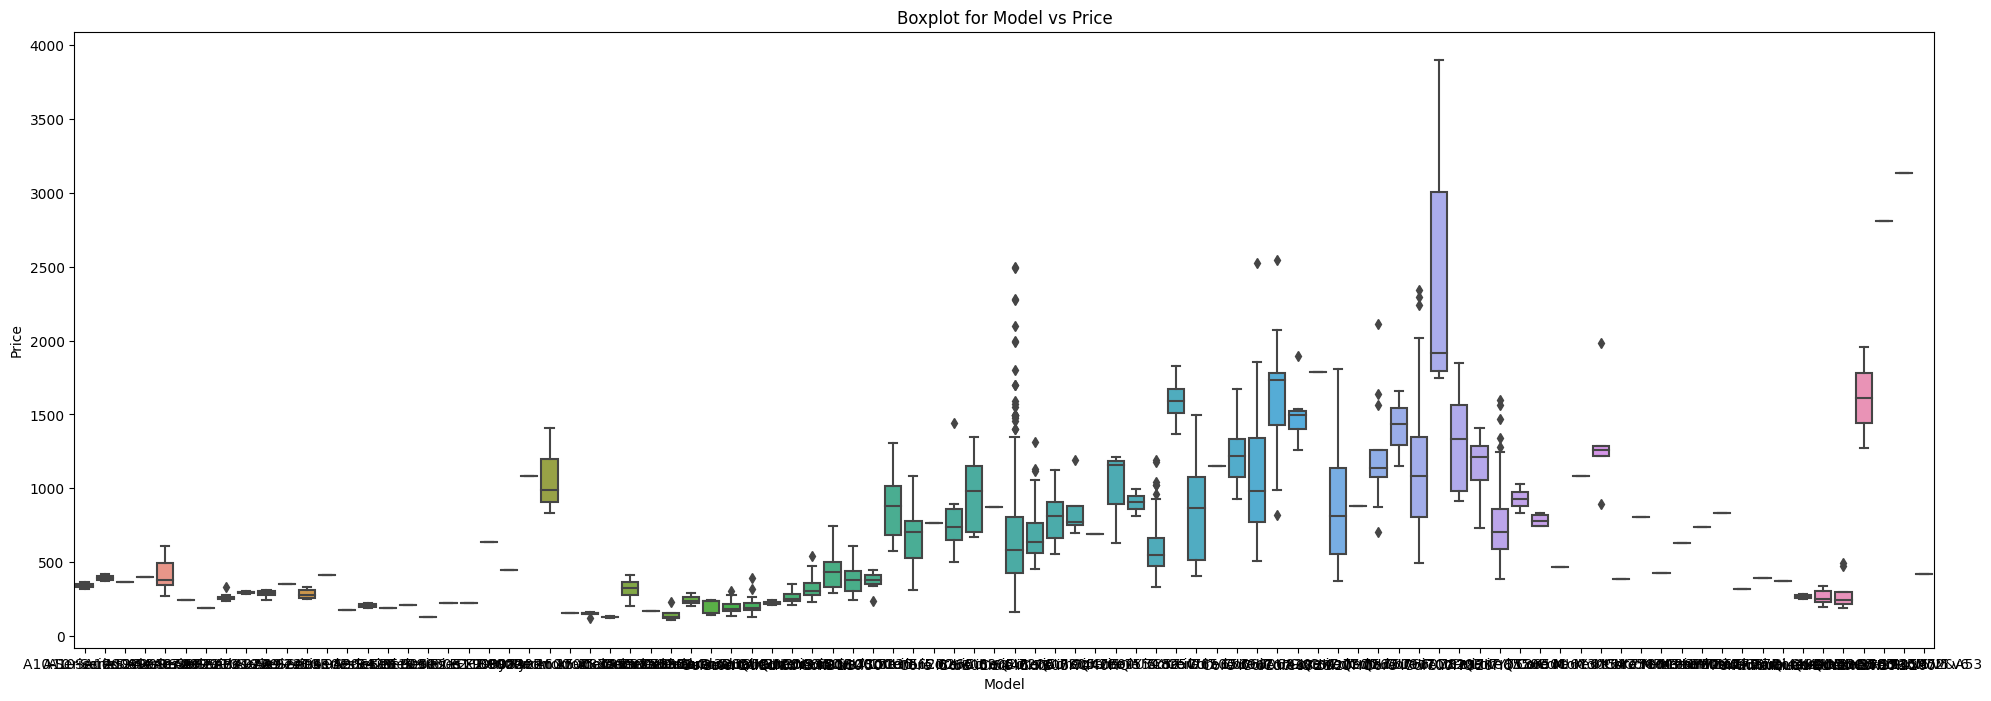

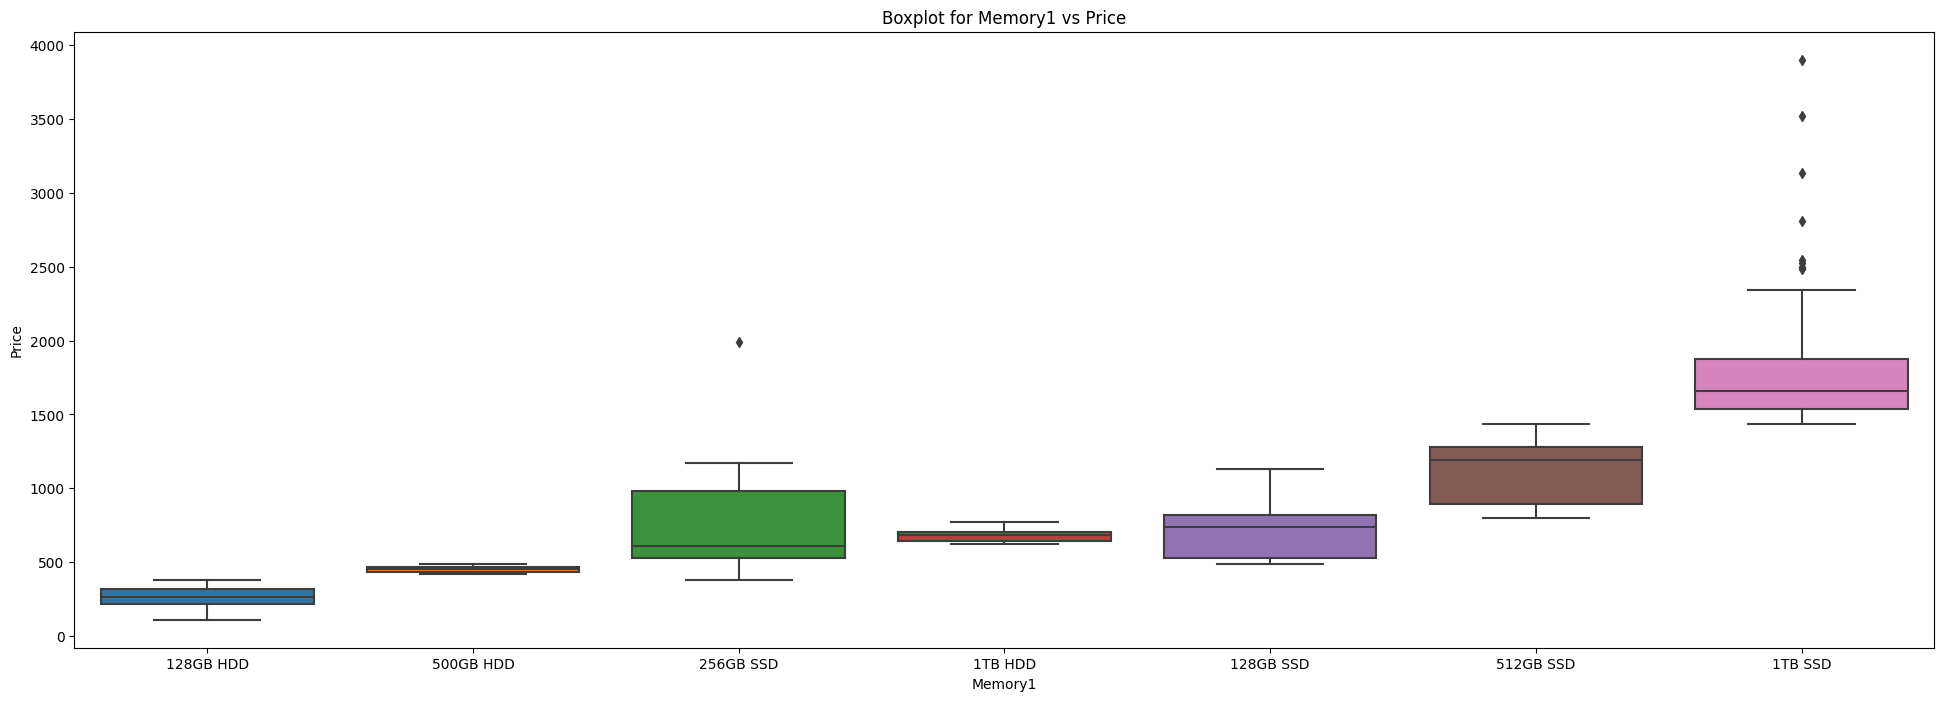

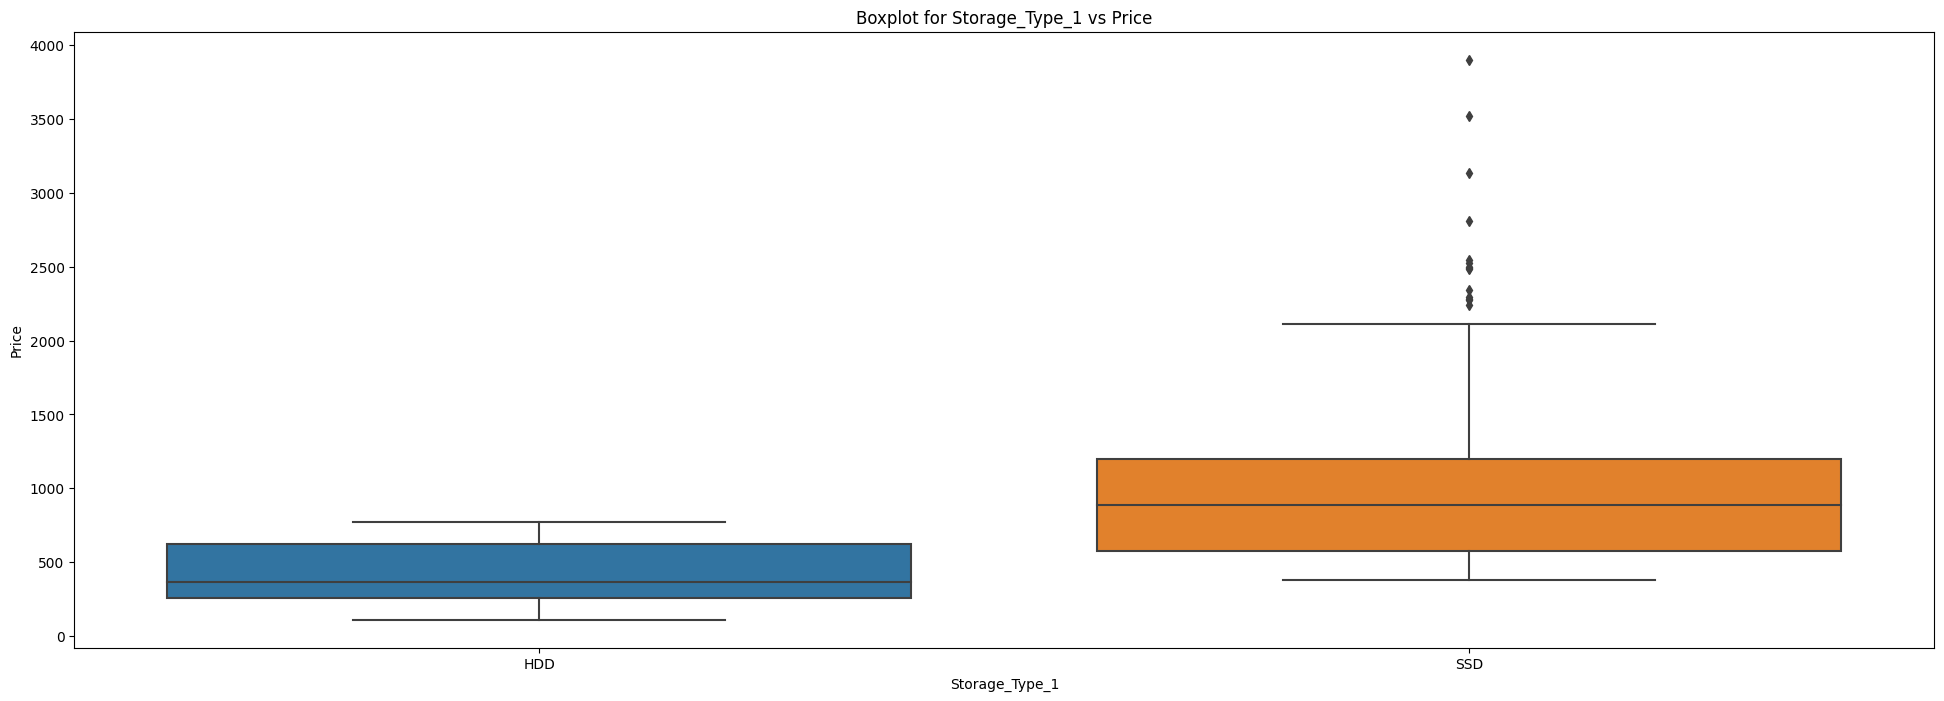

In [185]:
categorical_vars = ['Company', 'TypeName', 'OpSys', 'Screen_resolution', 'Brand_RAM', 'Model', 'Memory1', 'Storage_Type_1']

# Tạo DataFrame con chỉ chứa thông tin cần thiết
df_boxplot = df[categorical_vars + ['Price']]

# Vẽ boxplot cho từng biến hạng mục
for var in categorical_vars:
    plt.figure(figsize=(24, 8))
    sns.boxplot(x=var, y='Price', data=df_boxplot)
    plt.title(f'Boxplot for {var} vs Price')
    plt.show()

##Sắp xếp các biến ảnh hưởng đến laptop theo thứ tự giảm dần

In [186]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming df is your DataFrame
categorical_vars = ['Company', 'TypeName', 'OpSys', 'Screen_resolution', 'Brand_RAM', 'Model', 'Memory1', 'Storage_Type_1']
df_categorical = df[['Price'] + categorical_vars]

# Initialize a list to store the ANOVA results
result_anova_categorical = []

# Perform ANOVA for each categorical variable
for var in categorical_vars:
    groups = df_categorical.groupby(var)['Price'].apply(list)
    f_statistic, p_value = f_oneway(*groups)

    if p_value < 0.05:
        result_anova_categorical.append({'Variable': var, 'F-statistic': f_statistic, 'P-value': p_value, 'Mức ý nghĩa': 'Có'})
    else:
        result_anova_categorical.append({'Variable': var, 'F-statistic': f_statistic, 'P-value': p_value, 'Mức ý nghĩa': 'Không'})

# Create a DataFrame from the results
result_df = pd.DataFrame(result_anova_categorical)

# Sort the DataFrame by F-statistic in descending order
result_df_sorted = result_df.sort_values(by='F-statistic', ascending=False)


In [187]:
result_df_sorted_df=pd.DataFrame(result_df_sorted)

In [188]:
result_df_sorted_df

,Variable,F-statistic,P-value,Mức ý nghĩa
1,TypeName,1871.077383,0.000000e+00,Có
6,Memory1,868.648735,0.000000e+00,Có
7,Storage_Type_1,691.326184,1.880681e-123,Có
2,OpSys,480.477750,0.000000e+00,Có
4,Brand_RAM,22.565182,2.290060e-10,Có
0,Company,18.224343,8.126723e-57,Có
5,Model,17.320328,2.827334e-164,Có
3,Screen_resolution,16.815298,9.305150e-93,Có


##Tìm nhãn hàng ảnh hưởng đến giá laptop nhiều nhất

In [189]:
df['Company'].value_counts()

Dell         318
HP           300
Lenovo       270
Asus         154
Acer         103
MSI           54
Toshiba       48
Microsoft     22
Apple         21
Alienware     17
Samsung        9
DELL           8
Mediacom       7
Razer          7
Vero           4
Fujitsu        3
Chuwi          3
Google         3
LG             3
Huawei         2
Xiaomi         1
Name: Company, dtype: int64

In [190]:
import pandas as pd
from scipy.stats import f_oneway
# Thực hiện ANOVA
result = f_oneway(*[df['Price'][df['Company'] == brand] for brand in df['Company'].unique()])

# Hiển thị kết quả
print("Kết quả ANOVA:")
print("Statistic =", result.statistic)
print("p-value =", result.pvalue)

# Kiểm tra giá trị p
alpha = 0.05
if result.pvalue < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thuyết H0: Các nhãn hàng không ảnh hưởng đến giá.")
else:
    print("Không đủ bằng chứng để bác bỏ giả thuyết H0: Các nhãn hàng không ảnh hưởng đến giá.")

Kết quả ANOVA:
Statistic = 18.224343007294394
p-value = 8.12672339520227e-57
Có đủ bằng chứng để bác bỏ giả thuyết H0: Các nhãn hàng không ảnh hưởng đến giá.


In [191]:
df

,Company,TypeName,Inches,OpSys,Weight,Price,Ram_capacity,Ram_model,Touchscreen,Screen_resolution,...,Memory1,Memory2,Capacity1,Storage_Type_1,Capacity2,Storage_Type_2,ScreenResolution_encoded,Cpu_encoded,Gpu_encoded,Memory_encoded
0,Lenovo,Notebook,17.3,Windows 10,2.40,319.0,6.0,0,0,1920x1080,...,128GB HDD,0,128.0,HDD,0.0,0,35,0,18,0
1,HP,Notebook,17.3,Windows 10,2.65,363.8,4.0,0,0,1920x1080,...,128GB HDD,0,128.0,HDD,0.0,0,42,0,29,0
2,Acer,Notebook,17.3,Windows 10,2.20,370.2,4.0,0,0,1366x768,...,128GB HDD,0,128.0,HDD,0.0,0,0,1,34,0
3,HP,Notebook,15.6,Windows 10,2.71,418.8,4.0,0,0,1920x1080,...,500GB HDD,0,500.0,HDD,0.0,0,42,1,7,10
4,HP,Notebook,17.3,Windows 10,1.91,363.7,4.0,0,0,1920x1080,...,128GB HDD,0,128.0,HDD,0.0,0,42,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Alienware,Gaming,18.4,System Windows 11 Pro,2.04,2275.0,325.0,1,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,66,116,110,5
1353,Alienware,Gaming,18.4,System Windows 11 Pro,2.04,2279.0,325.0,1,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,66,116,110,5
1354,Alienware,Gaming,18.4,System Windows 11 Pro,2.04,2488.0,164.0,1,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,66,116,40,5
1355,Alienware,Gaming,18.4,System RTX 3080,2.04,2499.0,324.0,1,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,66,116,110,5


In [192]:
# Tính giá trung bình cho mỗi nhãn hàng
average_prices_company = df.groupby('Company')['Price'].mean()

# Tìm nhãn hàng có giá trung bình cao nhất
most_influential_brand = average_prices_company.idxmax()
print(f"Nhãn hàng ảnh hưởng đến giá nhiều nhất là: {most_influential_brand}")

Nhãn hàng ảnh hưởng đến giá nhiều nhất là: Razer


In [193]:
# Tính giá trung bình cho mỗi loại laptop
average_prices_type = df.groupby('TypeName')['Price'].mean()

# Tìm loại laptop có giá trung bình cao nhất
most_influential_type = average_prices_type.idxmax()
print(f"Loại laptop ảnh hưởng đến giá nhiều nhất là: {most_influential_type}")

Loại laptop ảnh hưởng đến giá nhiều nhất là: Gaming
